In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#!pip install arabic_reshaper
print('Ok!')

Ok!


In [19]:
data = pd.read_csv('tweet.csv')
data.head()

,Tweets,created_at
0,حتى لو كل الشعب اخذ اللقاح يا ريت ثقافة البوس ...,2021-04-30 23:58:01
1,هل في خدمة تلقيح لكبار السن في المنزل اذا فيه ...,2021-04-30 22:07:53
2,يادي البلاوي الي ورا بعضيها شو نعمل طيب ناخد ا...,2021-04-30 20:21:43
3,اللي اخد اللقاح هاي الفترة شو نوع اللي اخدتوه,2021-04-30 20:11:42
4,خبراء اللقاح هو الحل الامثل لعودة التعليم الوج...,2021-04-30 19:04:06


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tweets      2869 non-null   object
 1   created_at  2869 non-null   object
dtypes: object(2)
memory usage: 45.0+ KB


In [21]:
data.Tweets

0       حتى لو كل الشعب اخذ اللقاح يا ريت ثقافة البوس ...
1       هل في خدمة تلقيح لكبار السن في المنزل اذا فيه ...
2       يادي البلاوي الي ورا بعضيها شو نعمل طيب ناخد ا...
3           اللي اخد اللقاح هاي الفترة شو نوع اللي اخدتوه
4       خبراء اللقاح هو الحل الامثل لعودة التعليم الوج...
                              ...                        
2865                                  ينهون هاليومين يروح
2866                                          ماحدا بيسال
2867    برشلونة يهزم بلد الوليد ويقلص الفارق مع اتلتيك...
2868    لمن اقسم و ما زال يحفظ القسم لمن راى الحسين نف...
2869    كلوب امام القرار المصيري لموقعة ريال مدريد وجو...
Name: Tweets, Length: 2870, dtype: object

## Text tokinization

In [22]:
import nltk
from nltk import sent_tokenize,word_tokenize
from nltk.probability import FreqDist
nltk.download("stopwords")
from collections import Counter


[nltk_data] Downloading package stopwords to C:\Users\Computergy
[nltk_data]     World\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
# Define a list of arabic and english punctiations that we want to get rid of in our text
import string
import re 
arb_stopwords = set(nltk.corpus.stopwords.words("arabic")).union({'الله','او','من','الى','عن','على','في','ان'})

def preprocess(text):
    
    '''
    remove stop words and unkwon characters
    '''
    text = str(text)
    text= re.sub("الردن",'الاردن' ,text)
    #text= re.sub("ال",' ' ,text)
    text= re.sub(r"\b[ا-ي]\b",' ' ,text)
    filtered = []
    for w in text.split():
        w = re.sub(r"[0-9a-zA-Z]", "", w,flags=re.I)
        if w not in arb_stopwords:
            filtered.append(w)
    text = ' '.join(word for word in filtered)

    return text
  
data['Tweets'] = data['Tweets'].apply(preprocess)
print(data.head(5))

                                              Tweets           created_at
0         الشعب اخذ اللقاح ريت ثقافة البوس ترجع ابدا  2021-04-30 23:58:01
1  خدمة تلقيح لكبار السن المنزل اذا ماهي الية الت...  2021-04-30 22:07:53
2  يادي البلاوي الي ورا بعضيها شو نعمل طيب ناخد ا...  2021-04-30 20:21:43
3      اللي اخد اللقاح هاي الفترة شو نوع اللي اخدتوه  2021-04-30 20:11:42
4  خبراء اللقاح الحل الامثل لعودة التعليم الوجاهي...  2021-04-30 19:04:06


In [24]:
Tweets = data['Tweets'].values.tolist()

In [25]:
tokenized = []
for i in Tweets :
    i = word_tokenize(i)
    for b in i :
        tokenized.append(b)

In [26]:
print('tokeniz=',len(tokenized ))
print('type=',len(set(tokenized) ))

tokeniz= 36216
type= 10652


In [27]:
from arabic_reshaper import reshape      
from bidi.algorithm import get_display   

rtl = lambda w: get_display(reshape(f'{w}'))

COUNTS = Counter(tokenized )
counts = ((rtl(k),v) for k, v in COUNTS.most_common(15))

In [42]:
COUNTS.most_common(20)

[('لقاح', 1196),
 ('مطعوم', 1187),
 ('كورونا', 812),
 ('اردن', 454),
 ('عاجل', 320),
 ('جرعة', 291),
 ('مطاعيم', 236),
 ('صحة', 230),
 ('انا', 184),
 ('يوم', 169),
 ('مش', 142),
 ('فايزر', 139),
 ('تلقوا', 135),
 ('استرازينيكا', 133),
 ('انه', 133),
 ('مليون', 130),
 ('اخباري', 130),
 ('ناس', 127),
 ('اولى', 124),
 ('اي', 122)]

In [36]:
word=[]
count=[]
for i in counts:
    word.append(i[0])
    count.append(i[1])


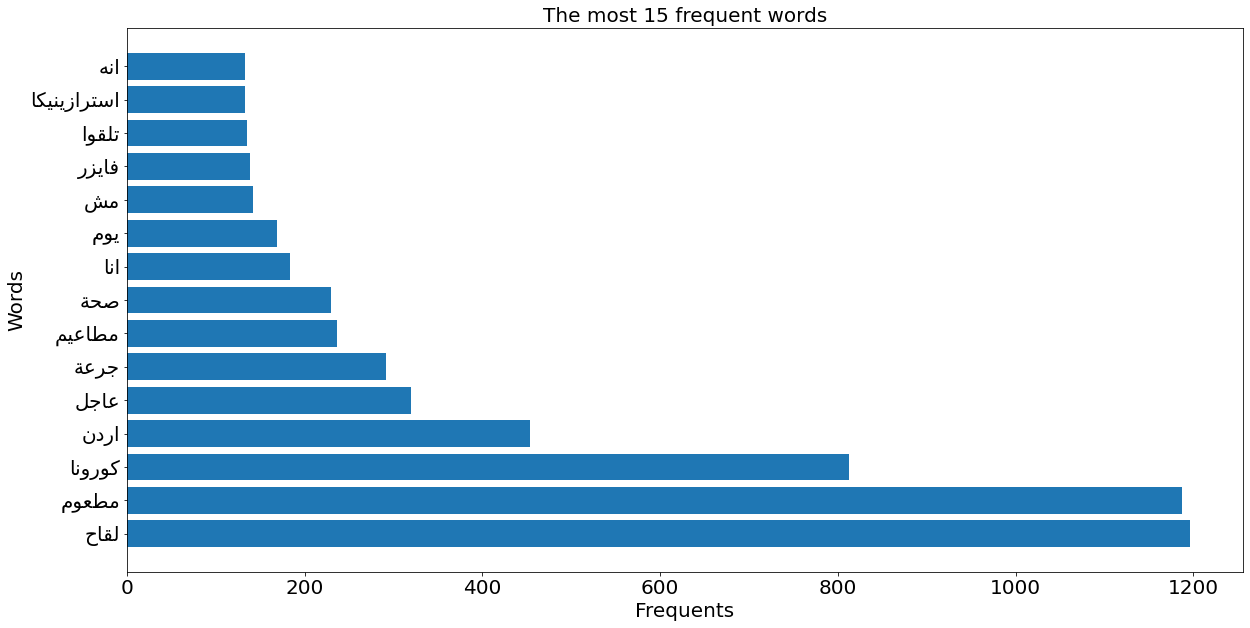

In [37]:
plt.barh(word, count)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.rcParams["figure.figsize"] = (20,10)
plt.ylabel('Words' , fontsize=20)
plt.xlabel('Frequents' , fontsize=20)
plt.title('The most 15 frequent words' , fontsize=20)
plt.savefig('Figures\most common words.png')
plt.show()

# wordcloud

In [38]:
#!pip install wordcloud
print('Ok!')

Ok!


In [29]:
import numpy as np
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator 
from PIL import Image
Jordan = np.array(Image.open('Images\jo.png'))

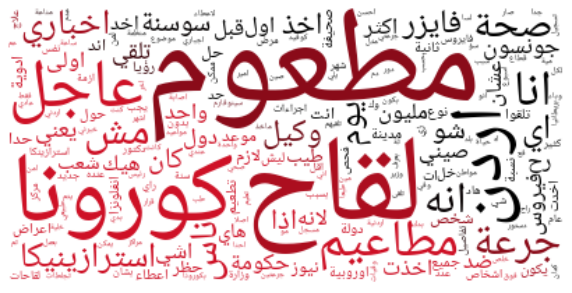

In [94]:
counts = {rtl(k):v for k, v in COUNTS.most_common(4000)}

font_file = r'Font\NotoNaskhArabicUI-Regular.ttf'

wordcloud = WordCloud(font_path=font_file, background_color="white").generate_from_frequencies(counts)

# Font color
image_colors = ImageColorGenerator(Jordan)
plt.imshow(wordcloud.recolor(color_func=image_colors) , interpolation="bilinear")
#plt.imshow(wordcloud)#, interpolation="bilinear")

plt.axis("off")
plt.savefig('Figures\WordCloud.png')
plt.rcParams["figure.figsize"] = (10,6)
plt.show()


_____________________________________________________________________________________

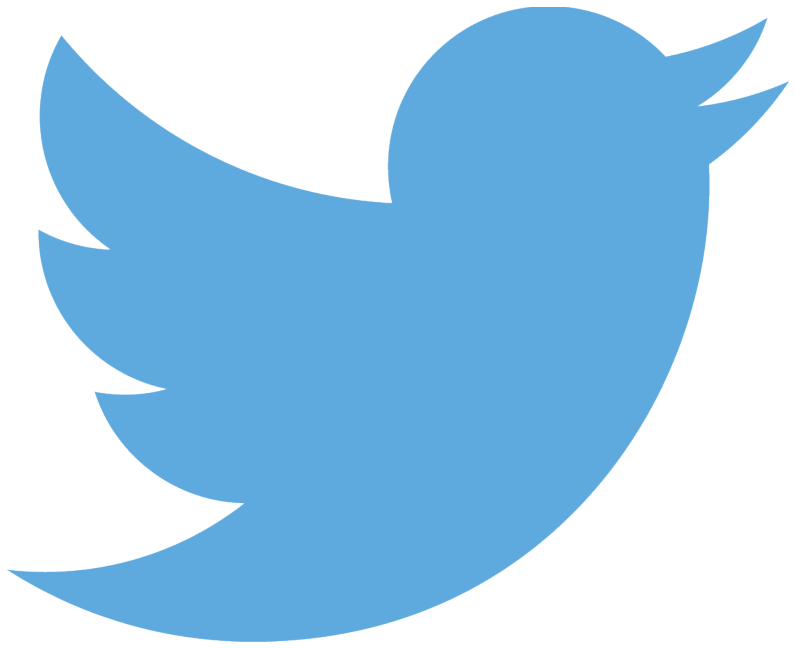

In [58]:
Twitter = np.array(Image.open('Images\Twitter_logo_blue.png'))
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height


plt.imshow(Twitter, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [59]:
# -- Arabic text dependencies
counts = {rtl(k):v for k, v in COUNTS.most_common(4000)}

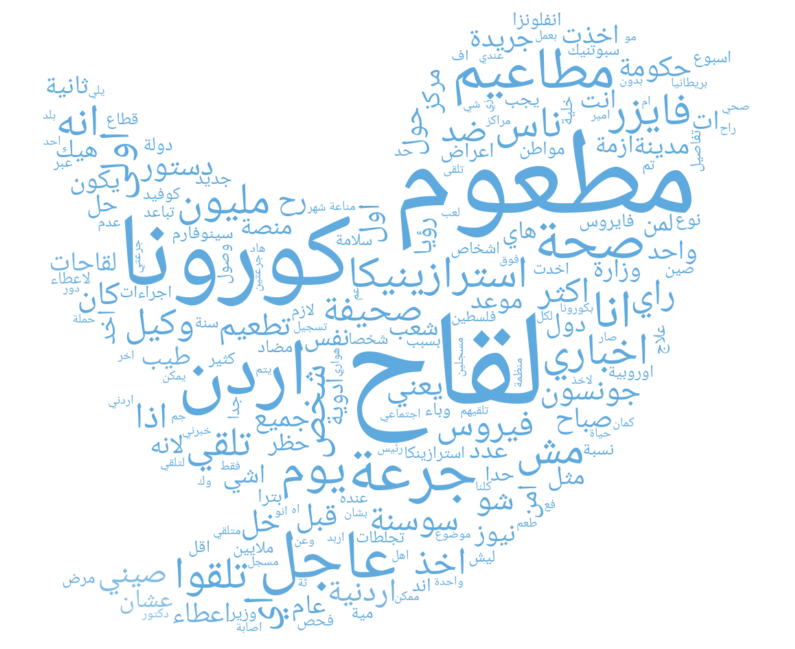

In [60]:
# instantiate a word cloud object
wordcloud = WordCloud(font_path=font_file, background_color="white", mask = Twitter )

# generate the word cloud
wordcloud.generate_from_frequencies(counts)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

image_colors = ImageColorGenerator(Twitter)
plt.imshow(wordcloud.recolor(color_func=image_colors) , interpolation="bilinear")
plt.axis("off")
plt.savefig('Figures\WordCloud2.png')
plt.show()

# ِAfter Sentement Analysis

In [6]:
df = pd.read_csv('predicted_tweets_AraBert.csv')
df.head()

,neg_proba,pos_proba,Tweet,sentiment
0,0.976242,0.023758,حتى لو كل الشعب اخذ اللقاح يا ريت ثقافة البوس ...,neg
1,0.946584,0.053416,هل في خدمة تلقيح لكبار السن في المنزل اذا فيه ...,neg
2,0.918195,0.081805,يادي البلاوي الي ورا بعضيها شو نعمل طيب ناخد ا...,neg
3,0.848099,0.151901,اللي اخد اللقاح هاي الفترة شو نوع اللي اخدتوه,neg
4,0.829155,0.170846,خبراء اللقاح هو الحل الامثل لعودة التعليم الوج...,neg


In [7]:
df['Tweet'] = df['Tweet'].apply(preprocess)

 Positive

In [8]:
Pos_tweets = df.loc[df['sentiment']=='pos']['Tweet'].values.tolist()
Pos_tweets[:10]

['لقاء الدكتور محمد حسن الطراونة المتحور الهندي اللقاح',
 'تلقى عدد الشخصيات مديرية صحة ادلب والكوادر الطبية وعناصر الدفاع المدني اللقاح ضد كوفيد وذلك',
 'سلاله جديده تغزو العالم ايها العالم عندي لقاحا طبيعيا يحميكم الكورونا وسلالاته لمن يبادر ويحمي نفسه',
 'اسرائيل اعلى كيان بالعالم بتوزيع اللقاح شعبها اصدروا قرار فترة بعودة الحياة',
 'وبالنسبة لموضوع الجرعة الثالثة يمكن فترة كلنا نحتاج لجرعة ثالثة اللقاح كان نوعه لتحفيز الاستجابة اكثر',
 'افتتاح المركز الخامس لاعطاء اللقاح النزول السيارة الاردن جريدة الدستور الاردنية',
 'عاجل خلية الازمة شخصا تلقوا الجرعة الاولى اللقاح',
 'افتتاح المركز الخامس لاعطاء اللقاح النزول السيارة',
 'تركيا تشتري مليون جرعة اللقاح الروسي سبوتنيك فلسطين جريدة القدس عاجل',
 'الف شخص تلقوا اللقاح بالزرقاء']

In [9]:
tokenized1 = []
for i in Pos_tweets :
    i = word_tokenize(str(i))
    for b in i :
        tokenized1.append(b)

In [10]:
print('tokeniz=',len(tokenized1 ))
print('type=',len(set(tokenized1) ))

tokeniz= 11836
type= 4323


 Negative

In [36]:
Neg_tweets = df.loc[df['sentiment']=='neg']['Tweet'].values.tolist()
Neg_tweets[:10]

['الشعب اخذ اللقاح ريت ثقافة البوس ترجع ابدا',
 'خدمة تلقيح لكبار السن المنزل اذا ماهي الية التسجيل ومانوع اللقاح',
 'يادي البلاوي الي ورا بعضيها شو نعمل طيب ناخد اللقاح اي نوع',
 'اللي اخد اللقاح هاي الفترة شو نوع اللي اخدتوه',
 'خبراء اللقاح الحل الامثل لعودة التعليم الوجاهي احداث اليوم الاردن كورونا',
 'عاجل لقاء الاسبوع عزمي محافظة الحظر الجزئي مفيد كورونا اكثر انتشارا بالبيوت تلقي المطعوم مسالة اخلاق',
 'البعض اخذ اللقاح منطقة الراس بلكي المخ اشتغل',
 'خبراء تربوي ون اللقاح الحل الامثل لعودة التعليم الوجاهي',
 'تم تلقيح الشعب الاسرائيلي قبل رمضان عزيزتي ولديهم فائض مليون اللقحات العالم كله يتسارع للحصول',
 'الاحوال القرار يصمد لوجود عدد ضخم الامارات تلقى اللقاح الصيني الحركه البلدين كبيره']

In [37]:
tokenized2 = []
for i in Neg_tweets :
    i = word_tokenize(str(i))
    for b in i :
        tokenized2.append(b)

In [13]:
print('tokeniz=',len(tokenized2 ))
print('type=',len(set(tokenized2) ))

tokeniz= 24380
type= 8174


### Positive WordCloud

In [14]:
unique_pos = set(tokenized1).difference(tokenized2) 
pos_tokenized=[]
for i in tokenized1:
    if i in unique_pos :
        pos_tokenized.append(i)
print('tokeniz=',len(pos_tokenized ))
print('type=',len(set(pos_tokenized) ))

tokeniz= 3716
type= 2478


In [15]:
COUNTS1 = Counter(pos_tokenized )
COUNTS1.most_common(15)

[('السلامة', 27),
 ('التباعد', 24),
 ('لعب', 24),
 ('الجمال', 21),
 ('زرع', 20),
 ('الكمامات', 18),
 ('ملعب', 16),
 ('العاب', 16),
 ('ملعوب', 16),
 ('مزارع', 15),
 ('لغة', 15),
 ('لاعب', 15),
 ('لعيب', 15),
 ('طعام', 15),
 ('زارع', 15)]

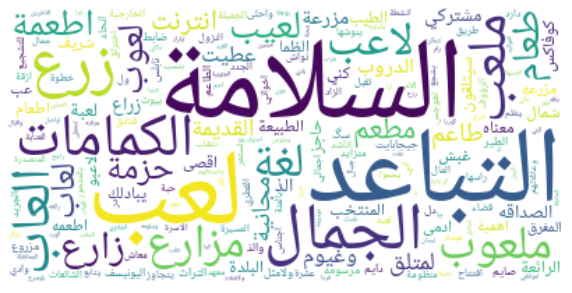

In [38]:
counts = {rtl(k):v for k, v in COUNTS1.most_common(2000)}

font_file = r'Font\NotoNaskhArabicUI-Regular.ttf'

wordcloud = WordCloud(font_path=font_file, background_color="white").generate_from_frequencies(counts)

plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")

plt.rcParams["figure.figsize"] = (10,6)
#plt.title('WordCloud for Positive Unique Words')
plt.savefig('Figures\WordCloud for Positive Unique Words.png')
plt.show()


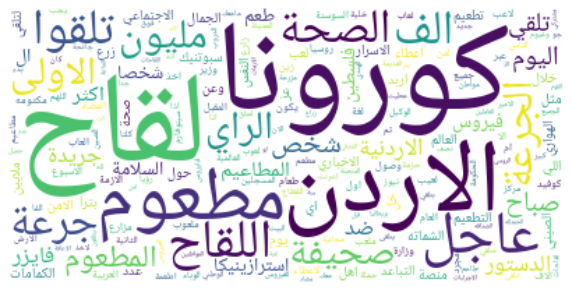

In [31]:
COUNTS3 = Counter(tokenized1)        
counts = {rtl(k):v for k, v in COUNTS3.most_common(2000)}

font_file = r'Font\NotoNaskhArabicUI-Regular.ttf'

wordcloud = WordCloud(font_path=font_file, background_color="white").generate_from_frequencies(counts)

plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")


#plt.title('WordCloud for Positive Words')
plt.rcParams["figure.figsize"] = (10,6)
plt.savefig('Figures\WordCloud for Positive Words.png')
plt.show()


### Negative WordCloud

In [32]:
unique_neg = set(tokenized2).difference(tokenized1) 
neg_tokenized=[]
for i in tokenized2:
    if i in unique_neg :
        neg_tokenized.append(i)
print('tokeniz=',len(neg_tokenized ))
print('type=',len(set(neg_tokenized) ))

tokeniz= 10379
type= 6329


In [33]:
COUNTS2 = Counter(neg_tokenized )
COUNTS2.most_common(15)

[('طيب', 40),
 ('اخد', 40),
 ('هاي', 40),
 ('لازم', 34),
 ('ليش', 33),
 ('حد', 30),
 ('هاد', 28),
 ('اه', 18),
 ('ماخذ', 18),
 ('بدي', 18),
 ('سؤال', 17),
 ('بدك', 17),
 ('خلص', 17),
 ('مين', 17),
 ('التعليم', 16)]

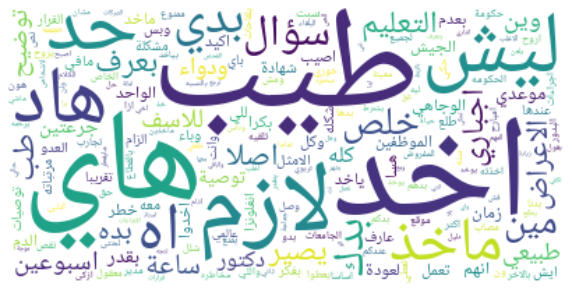

In [39]:
counts = {rtl(k):v for k, v in COUNTS2.most_common(4000)}

font_file = r'Font\NotoNaskhArabicUI-Regular.ttf'

wordcloud = WordCloud(font_path=font_file, background_color="white").generate_from_frequencies(counts)

plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")

plt.rcParams["figure.figsize"] = (10,6)
#plt.title('WordCloud for Negative Unique Words')
plt.savefig('Figures\WordCloud for Negative Unique Words.png')
plt.show()


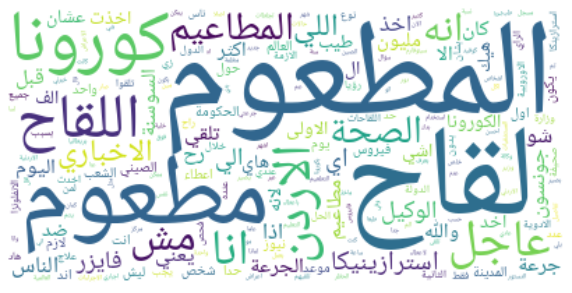

In [35]:
COUNTS4 = Counter(tokenized2)        
counts = {rtl(k):v for k, v in COUNTS4.most_common(2000)}

font_file = r'Font\NotoNaskhArabicUI-Regular.ttf'

wordcloud = WordCloud(font_path=font_file, background_color="white").generate_from_frequencies(counts)

plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")

plt.rcParams["figure.figsize"] = (10,6)
#plt.title('WordCloud for Negative Words')
plt.savefig('Figures\WordCloud for Negative Tweets.png')
plt.show()
